## ローパスフィルタの自作関数

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lowpassFilter(img, msize=30):
  dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-msize : crow+msize, ccol-msize : ccol+msize] = 1

  # apply mask and inverse DFT
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

  # 0~255で正規化
  img_back_max = img_back.max()
  img_back2 = (img_back * 255) / img_back_max
  img_back2 = img_back2.astype(np.uint8)
  return img_back2

## 画像プロットの自作関数

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib

def plotImg(noise, imp, org, plt, noimg=False, nopsnr=False):
  matplotlib.rcParams["font.family"] = "Meiryo"
  if not noimg:
    # 画像をプロット
    fig, ax = plt.subplots(1, 3, figsize=(12,5))
    ax[0].imshow(org, cmap="gray"), ax[0].set_title("元画像")
    ax[1].imshow(noise, cmap="gray"), ax[1].set_title("ノイズ付き画像")
    ax[2].imshow(imp, cmap="gray"), ax[2].set_title("ノイズ除去後画像")
    fig.tight_layout()
    fig.show()
    
  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, imp)
  if not nopsnr:
    # PSNRを表示
    print("noize PSNR =", noise_psnr)
    print("improvement PSNR =", imp_psnr)
    print("diff PSNR = ", imp_psnr-noise_psnr)

  return imp_psnr - noise_psnr

## ノイズ画像とメディアンフィルタをかけた画像の画素値の分布

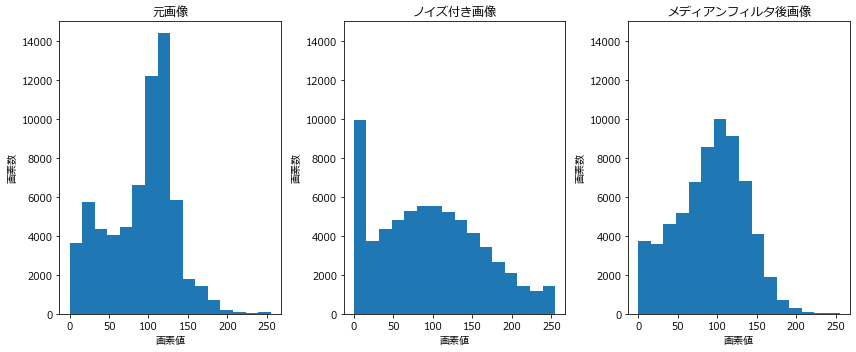

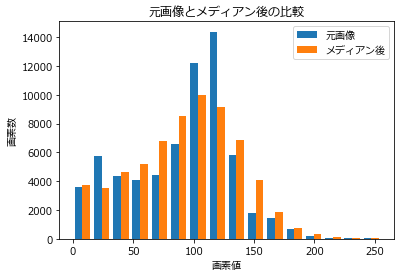

In [4]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["font.family"] = "Meiryo"

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst = cv2.medianBlur(noise, 3)

plt.figure(figsize=(12,5))
plt.subplot(131).hist(np.ravel(org), bins=16); plt.title("元画像")
plt.xlabel("画素値"); plt.ylabel("画素数")
plt.ylim(0, 15000)
plt.subplot(132).hist(np.ravel(noise), bins=16); plt.title("ノイズ付き画像")
plt.xlabel("画素値"); plt.ylabel("画素数")
plt.ylim(0, 15000)
plt.subplot(133).hist(np.ravel(dst), bins=16); plt.title("メディアンフィルタ後画像")
plt.xlabel("画素値"); plt.ylabel("画素数")
plt.ylim(0, 15000)
plt.tight_layout()
plt.show()

plt.hist([np.ravel(org), np.ravel(dst)], bins=16, label=["元画像", "メディアン後"]); plt.title("元画像とメディアン後の比較")
plt.xlabel("画素値"); plt.ylabel("画素数")
plt.legend()
plt.show()

## メディアンフィルタをかけたときの画素値が0の画素と255の画素

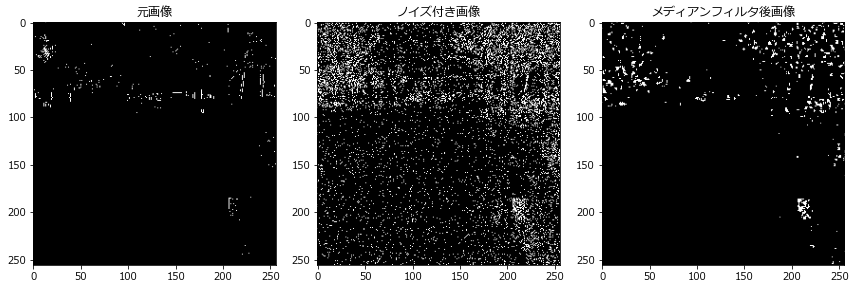

In [42]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

img = np.zeros((noise.shape))
img += noise == 0
img += noise == 255

img2 = np.zeros((org.shape))
img2 += org == 0
img2 += org == 255

median = cv2.medianBlur(noise, 3)
img3 = np.zeros((median.shape))
img3 += median == 0
img3 += median == 255

fig, ax = plt.subplots(1, 3,figsize=(12,5))
ax[0].imshow(img2, cmap="gray"); ax[0].set_title("元画像")
ax[1].imshow(img, cmap="gray"); ax[1].set_title("ノイズ付き画像")
ax[2].imshow(img3, cmap="gray"); ax[2].set_title("メディアンフィルタ後画像")
fig.tight_layout()
fig.show()

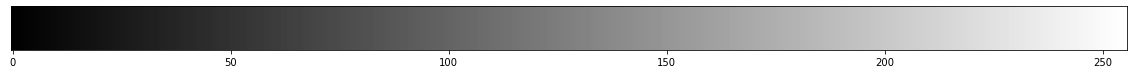

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.array(np.arange(256))
img2 = np.append(img, img)
for i in range(8):
  img2 = np.append(img2, img)
img2 = img2.reshape(10, 256)

plt.figure(figsize=(20, 5))
plt.imshow(img2, cmap="gray")
plt.yticks([])
plt.show()

## メディアンフィルタとバイラテラルフィルタをかけたときのエッジの残り方の比較

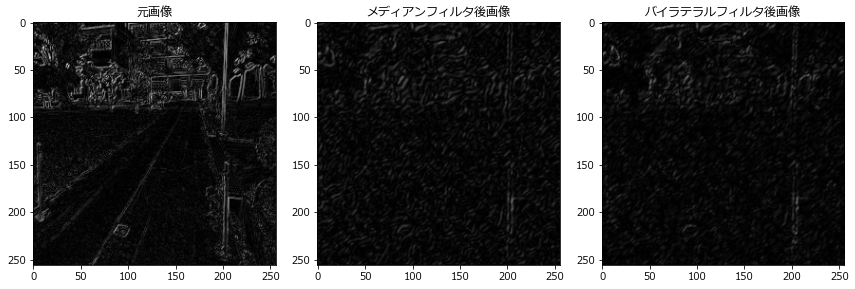

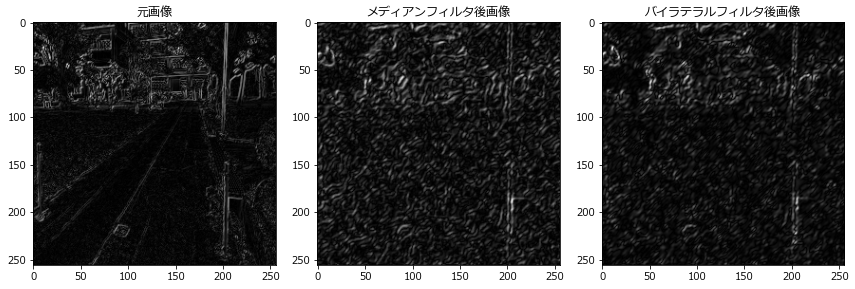

In [35]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

img = np.zeros((noise.shape))
img += cv2.Sobel(org, cv2.CV_32F, 1, 0, ksize=3)
img += cv2.Sobel(org, cv2.CV_32F, 0, 1, ksize=3)
img = np.abs(img)

dst1 = lowpassFilter(noise, 52)
dst2 = cv2.medianBlur(dst1, 5)

img2 = np.zeros((noise.shape))
img2 += cv2.Sobel(dst2, cv2.CV_32F, 1, 0, ksize=3)
img2 += cv2.Sobel(dst2, cv2.CV_32F, 0, 1, ksize=3)
img2 = np.abs(img2)

dst1 = lowpassFilter(noise, 59)
dst2 = cv2.bilateralFilter(dst1, 8, 56, 69)

img3 = np.zeros((noise.shape))
img3 += cv2.Sobel(dst2, cv2.CV_32F, 1, 0, ksize=3)
img3 += cv2.Sobel(dst2, cv2.CV_32F, 0, 1, ksize=3)
img3 = np.abs(img3)


rcParams["font.family"] = "Meiryo"

# 元画像に値を合わせたバージョン
fig, ax = plt.subplots(1, 3, figsize=(12,5))
im = ax[0].imshow(img, cmap="gray"); ax[0].set_title("元画像")
im.set_clim(0, img.max())
im = ax[1].imshow(img2, cmap="gray"); ax[1].set_title("メディアンフィルタ後画像")
im.set_clim(0, img.max())
im = ax[2].imshow(img3, cmap="gray"); ax[2].set_title("バイラテラルフィルタ後画像")
im.set_clim(0, img.max())
fig.tight_layout()
fig.show()

# 個々で値を調整したバージョン
fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].imshow(img, cmap="gray"); ax[0].set_title("元画像")
ax[1].imshow(img2, cmap="gray"); ax[1].set_title("メディアンフィルタ後画像")
ax[2].imshow(img3, cmap="gray"); ax[2].set_title("バイラテラルフィルタ後画像")
fig.tight_layout()
fig.show()

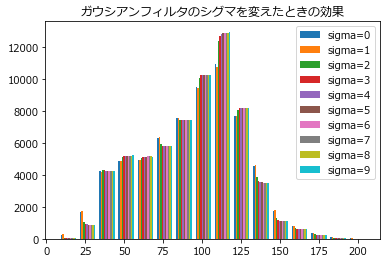

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst = lowpassFilter(noise, 50)

dst_l = []
sigma = range(10)
for s in sigma:
  dst_l.append(np.ravel(cv2.GaussianBlur(dst, ksize=(5, 5), sigmaX = int(s))))

# plt.figure(figsize=[12, 10])
plt.hist(dst_l, bins=16, label=list(map(lambda x: "sigma="+str(x), sigma))); plt.title("ガウシアンフィルタのシグマを変えたときの効果")
plt.legend()
plt.show()

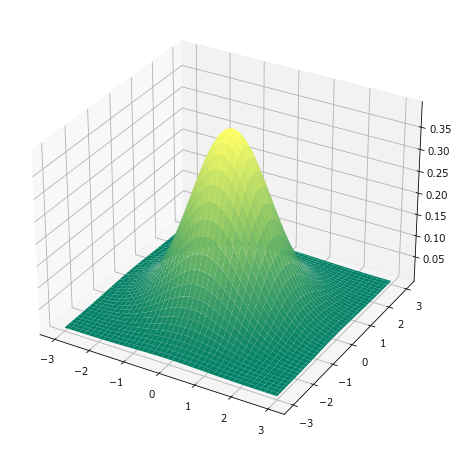

In [10]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1
# x = np.linspace(-1, 1, 3)
# y = np.linspace(-1, 1, 3)
x = np.linspace(-3, 3, 256)
y = np.linspace(-3, 3, 256)
X, Y = np.meshgrid(x, y)

Z = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(X**2 + Y**2)/(2 * sigma**2))
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="summer")
plt.show()